In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

from src.experiment.ablate import Ablate, AblateMultiLen
from src.dataset import TlensDataset
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head

import torch
torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

/home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model = WrapHookedTransformer.from_pretrained("gpt2")
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 10000


## Get ablation data

In [4]:
ablation_heads_cp = torch.load("../results/gpt2_examples_cp.pt")
ablation_heads_mem  = torch.load("../results/gpt2_examples_mem.pt")

In [10]:
ablation_heads_mem.shape

torch.Size([12, 12, 9200])

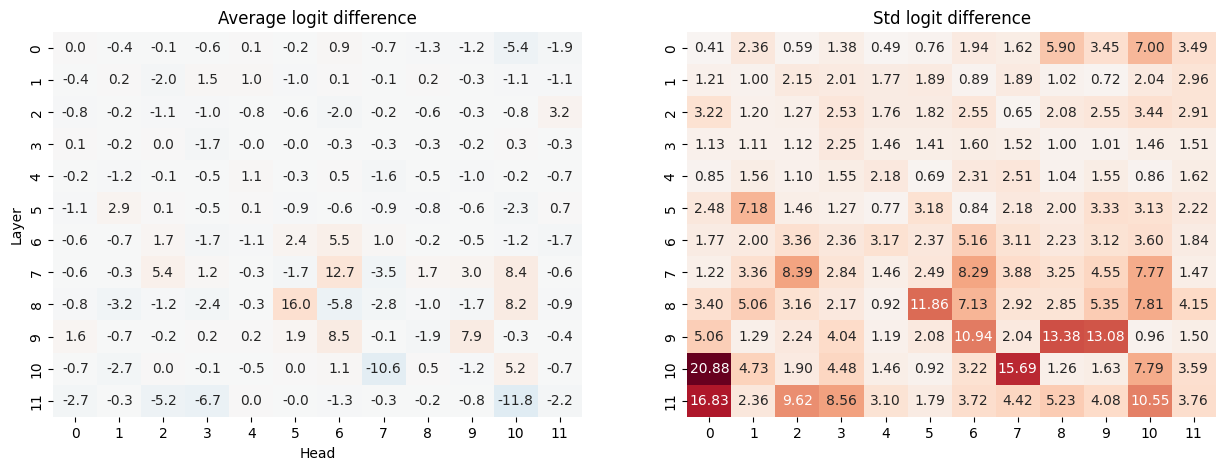

In [14]:
plot_heatmaps(ablation_heads_mem.mean(-1), ablation_heads_mem.std(-1), title="ciao", interval=100 )

In [57]:
# select indices of the heads that have a value > 10
head_mem = ablation_heads_mem[11,0]
indices_pos = torch.where(head_mem > 10)[0]
indices_neg = torch.where(head_mem < -10)[0]
print(indices_pos.shape, indices_neg.shape)

torch.Size([1870]) torch.Size([2056])


<Axes: ylabel='Count'>

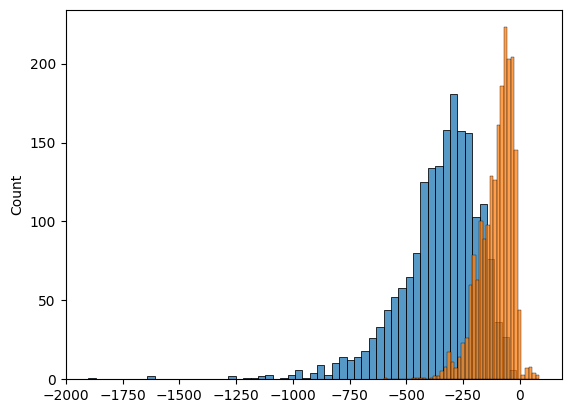

In [59]:
sns.histplot(ablation_heads_cp[11,0, indices_pos])
sns.histplot(ablation_heads_cp[11,0, indices_neg])

<Axes: ylabel='Count'>

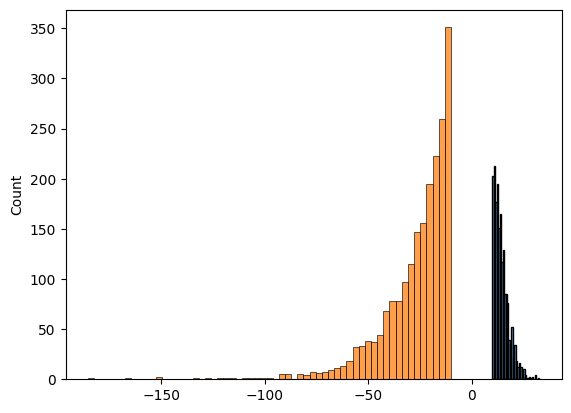

In [58]:
sns.histplot(ablation_heads_mem[11,0, indices_pos])
sns.histplot(ablation_heads_mem[11,0, indices_neg])
# sns.histplot(ablation_heads_mem[11,0])